1

In [6]:
import numpy as np
# rejection rate
1 - np.sqrt(np.pi/2)*np.exp(-1/2)

0.23982654946685966

In [7]:
import numpy as np
np.exp(2)

7.3890560989306504

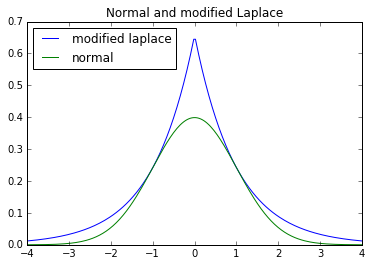

In [8]:
# plot
import matplotlib.pyplot as plt
from scipy.stats import laplace
from scipy.stats import norm
% matplotlib inline

a = np.linspace(-4,4, 200)
plt.plot(a, np.sqrt(2/np.pi)*np.exp(1/2)*laplace.pdf(a), label = 'modified laplace')
plt.plot(a, norm.pdf(a), label = 'normal')
plt.title('Normal and modified Laplace')
plt.legend(loc = 'upper left')
plt.show()

In [9]:
# rejection sampling
np.random.seed(1234)
counter = 0
samples = []
C = np.sqrt(2/np.pi)*np.exp(1/2)
while len(samples) < 10000:
    counter += 1
    lottery = np.random.uniform()
    draw = np.random.laplace()
    if lottery <= norm.pdf(draw)/(laplace.pdf(draw)*C):
        samples.append(draw)

print(1-len(samples)/counter)

0.2420797332120661


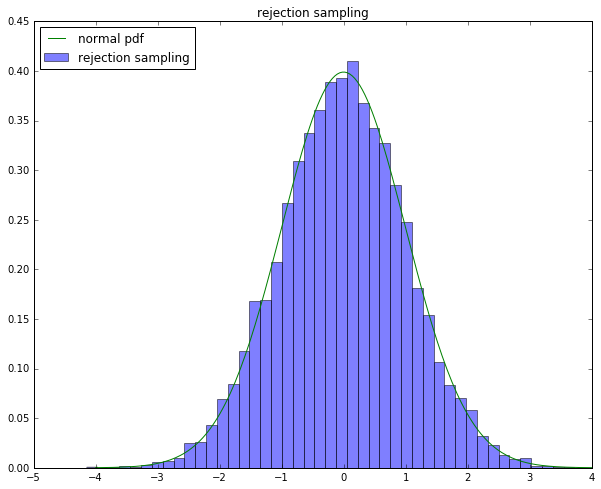

In [10]:
# plot
plt.figure(figsize=(10, 8))
weights = np.ones_like(samples)/len(samples)
plt.hist(samples, bins = 45,normed = 1, alpha = 0.5, weights=weights,label = 'rejection sampling')
plt.plot(a, norm.pdf(a), label = 'normal pdf')
plt.legend(loc = 'upper left')
plt.title('rejection sampling')
plt.show()

2

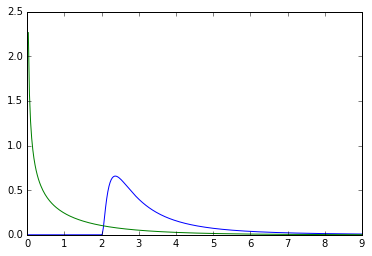

In [11]:
from scipy.stats import lognorm
from scipy.stats import chi2

a = np.linspace(0, 9, 300)
plt.plot(a, lognorm.pdf(a,1, loc = 2), label = 'LogNormal')
plt.plot(a, chi2.pdf(a, df = 1), label = 'LogNormal')
plt.show()

In [12]:
# J = 10000 * 10
first_draw = np.random.chisquare(1,100000)
w_s = [lognorm.pdf(i, 1, loc = 2)/chi2.pdf(i, df = 1) for i in first_draw]

In [13]:
s = sum(w_s)
weights = [i/s for i in w_s]
sum(weights)

1.0000000000000033

In [22]:
# m = 10000
# choose 10000 from 100000 first draws
samples = []
cum = np.cumsum(weights)
while len(set(samples)) < 10000:
    u = np.random.uniform()
    samples.append(first_draw[np.searchsorted(cum, u)])

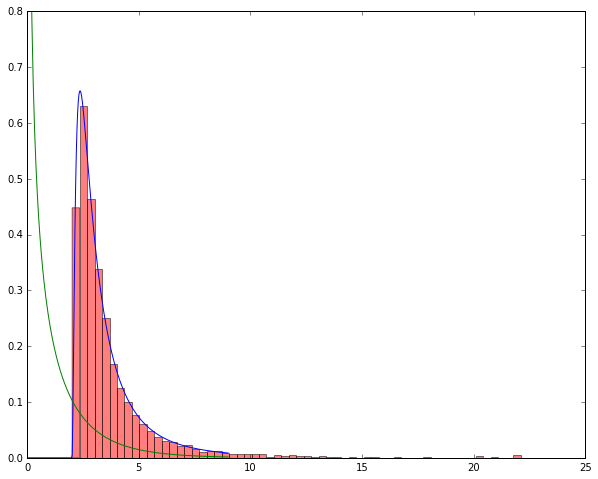

In [27]:
# without replacement
a = np.linspace(0, 9, 300)
wei = np.ones_like(samples)/len(samples)
plt.figure(figsize=(10, 8))
plt.plot(a, lognorm.pdf(a,1, loc = 2), label = 'LogNormal')
plt.plot(a, chi2.pdf(a, df = 1), label = 'LogNormal')
plt.hist(samples, bins = 60,normed = 1, alpha = 0.5, weights=wei,label = 'SIR')
plt.ylim(0, 0.8)
plt.show()

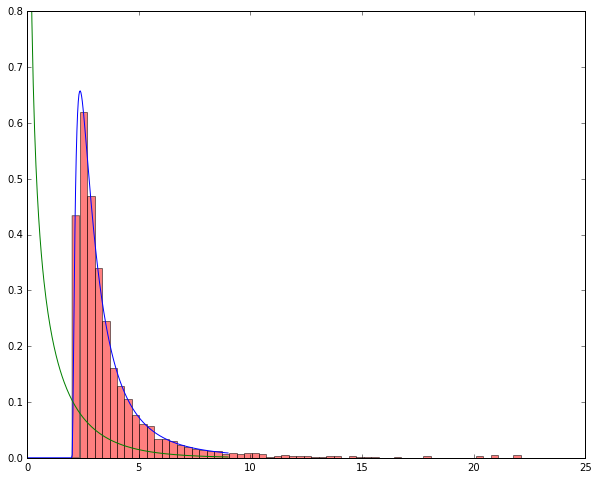

In [28]:
# replacement
samples_replace = []
cum = np.cumsum(weights)
while len(samples_replace) < 10000:
    u = np.random.uniform()
    samples_replace.append(first_draw[np.searchsorted(cum, u)])

a = np.linspace(0, 9, 300)
wei = np.ones_like(samples_replace)/len(samples_replace)
plt.figure(figsize=(10, 8))
plt.plot(a, lognorm.pdf(a,1, loc = 2), label = 'LogNormal')
plt.plot(a, chi2.pdf(a, df = 1), label = 'LogNormal')
plt.hist(samples_replace, bins = 60,normed = 1, alpha = 0.5, weights=wei,label = 'SIR')
plt.ylim(0, 0.8)
plt.show()

3

In [67]:
# Gibbs Sampling
# めっちゃ時間かかるで
from scipy.stats import poisson
R = [1]
T = [1]
while len(R) < 100000:
    t = T[-1]
    u = np.random.uniform()
    for i in range(1, 10000):
        if u <= poisson.cdf(i, mu = t) / (1 - np.exp(-t)):
            R.append(i)
            break
    T.append(np.random.gamma(R[-1], scale = 1))

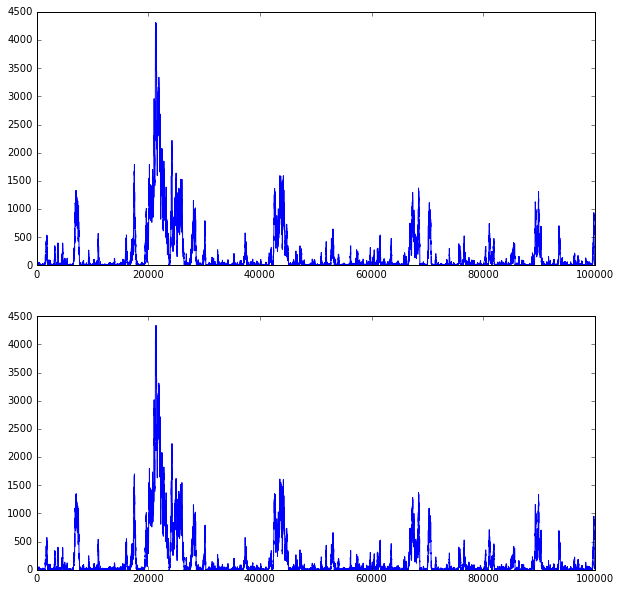

In [72]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
ax[0].plot(R)
ax[1].plot(T)
ax[0].set_xlim([0,100000])
ax[1].set_xlim([0,100000])
#ax[0].set_ylim([0,500])
#ax[1].set_ylim([0, 500])
plt.show()

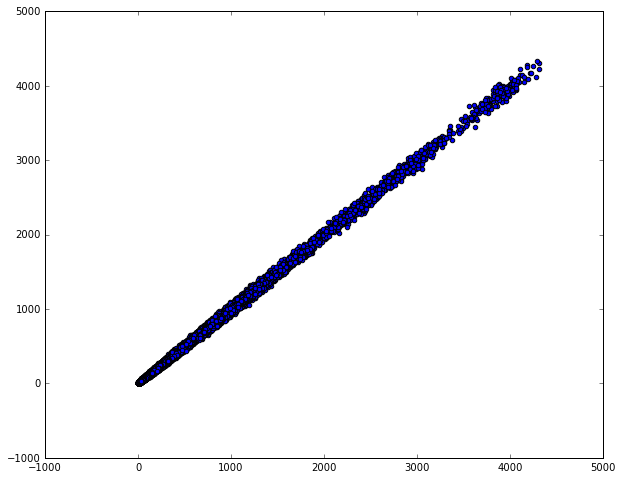

In [69]:
plt.figure(figsize = (10,8))
plt.scatter(R, T)
plt.show()

In [66]:
np.random.gamma(1, scale = 1)

0.13630547510242605

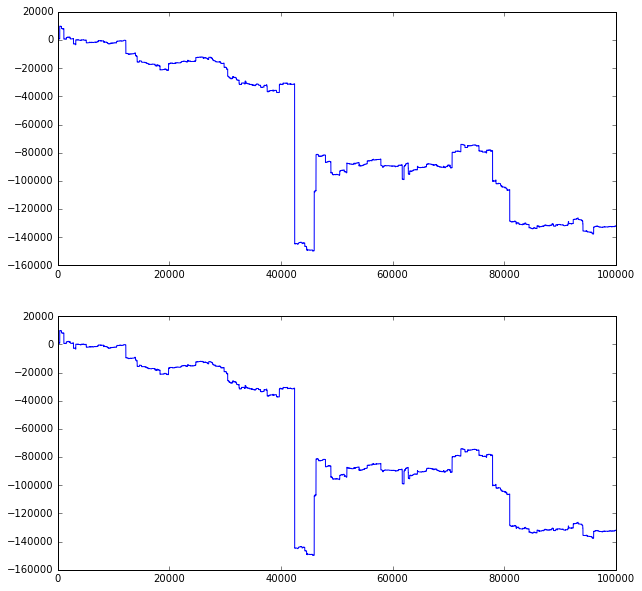

In [23]:
# normal and cauchy
from scipy.stats import cauchy
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
np.random.seed(1234)
X = [0]
Y = []
while len(Y) < 100000:
    y = np.random.normal(loc = X[-1])
    Y.append(y)
    x = cauchy.rvs(loc = Y[-1])
    X.append(x)

X.pop()
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
ax[0].plot(X)
ax[1].plot(Y)
ax[0].set_xlim([0,100000])
ax[1].set_xlim([0,100000])
plt.show()

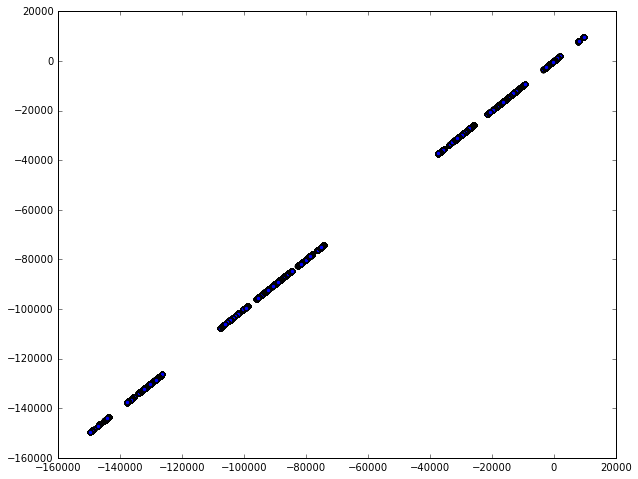

In [24]:
plt.figure(figsize = (10,8))
plt.scatter(X, Y)
plt.show()

In [17]:
len(X)

TypeError: object of type 'numpy.float64' has no len()

In [12]:
len(Y)

99999

4

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
q4 = pd.read_csv('q4.csv')
q4.size

100

In [58]:
# true marginal likelihood
# これなら1000でもそこそこ収束する
import numpy as np

sigma = 0.0001
n = 100
y = np.ravel(q4.values)
y_sum = y.sum()
y_square = [i**2 for i in y]
y_squ_sum = sum(y_square)

(np.exp(-y_squ_sum/2 + (y_sum**2 * sigma)/(2*(sigma * n + 1)))) / ((2*np.pi)**(n/2) * (sigma * n + 1)**(1/2))

4.6696038461713639e-147

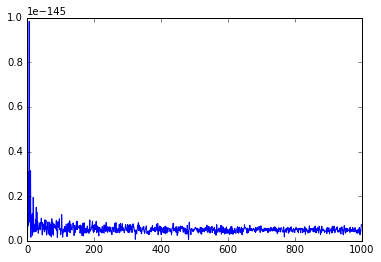

In [52]:
pos_mean = y_sum*sigma/(1+n*sigma)
pos_var = sigma/(1+n*sigma)

harmonic_mean = []
for i in range(1, 1000):
    samples = np.random.normal(loc = pos_mean, scale = np.sqrt(pos_var), size = i)
    harmonic = [((2*np.pi)**(n/2))/np.exp(-(n*(j**2) - 2*y_sum * j + y_squ_sum)/2) for j in samples]
    harmonic_mean.append(i/sum(harmonic))

plt.plot(harmonic_mean)

In [53]:
harmonic_mean[-10:]

[3.6043284059727866e-147,
 5.2500910035799109e-147,
 4.8447276288608997e-147,
 5.9244538425504854e-147,
 5.0510815690353925e-147,
 2.7064865467238971e-147,
 5.0274170124633678e-147,
 4.0214743568834461e-147,
 5.609219078679383e-147,
 7.2819458936156031e-147]

問題になってるのはこっち

これは収束しない

priorがデータよりも情報を持ってないとあかん

In [54]:
sigma = 100
n = 100
y = np.ravel(q4.values)
y_sum = y.sum()
y_square = [i**2 for i in y]
y_squ_sum = sum(y_square)

(np.exp(-y_squ_sum/2 + (y_sum**2 * sigma)/(2*(sigma * n + 1)))) / ((2*np.pi)**(n/2) * (sigma * n + 1)**(1/2))

9.4421365891952808e-65

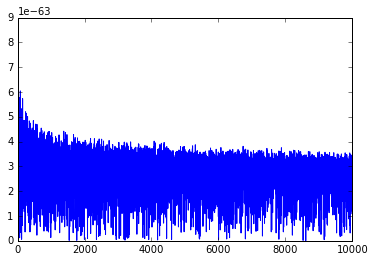

In [56]:
pos_mean = y_sum*sigma/(1+n*sigma)
pos_var = sigma/(1+n*sigma)

harmonic_mean = []
for i in range(1, 10000):
    samples = np.random.normal(loc = pos_mean, scale = np.sqrt(pos_var), size = i)
    harmonic = [((2*np.pi)**(n/2))/np.exp(-(n*(j**2) - 2*y_sum * j + y_squ_sum)/2) for j in samples]
    harmonic_mean.append(i/sum(harmonic))

plt.plot(harmonic_mean)

In [57]:
harmonic_mean[-10:]

[2.6938229313172919e-63,
 3.277612172157882e-63,
 3.310122865119639e-63,
 2.5976835365193283e-63,
 3.0223964211816384e-63,
 2.4251768333712265e-63,
 2.4238171600492103e-63,
 2.6702608971470789e-63,
 3.2448871916591915e-63,
 3.2620358436547568e-63]

5

0.0281
0.0587
0.1461
0.2872
0.4721
0.7226


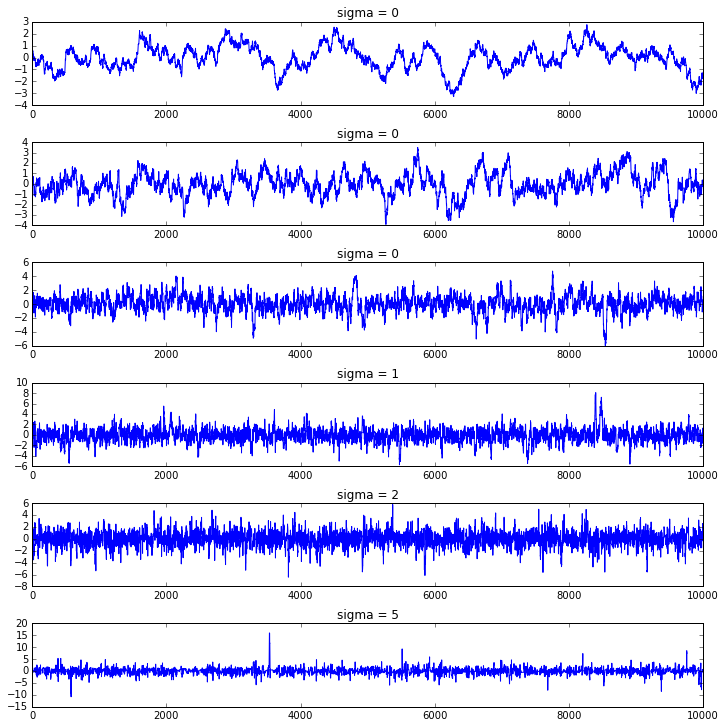

In [67]:
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

sigma = [0.1, 0.2, 0.5, 1, 2, 5]
fig, ax = plt.subplots(nrows = len(sigma), ncols = 1, figsize = (10,10))
for n,i in enumerate(sigma):
    samples = [0]
    counter = 0
    while len(samples) < 10000:
        propose = samples[-1] + np.random.normal(scale = i)
        u = np.random.uniform()
        if u <= min(t.pdf(propose, df = 5)/t.pdf(samples[-1], df = 5), 1):
            samples.append(propose)
        else:
            counter += 1
            samples.append(samples[-1])
    print(counter/len(samples))
    ax[n].plot(samples)
    ax[n].set_title('sigma = %i' %i)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()